# Observation / Model plot of 


* climate change
* irrigation-induced change

SREX_irr_boxplots.py

author: Auke Visser
date: 12.12.2016

This script makes binned boxplots of dT_tot and dT_irr.
First, the upper two panels are filled (dT_tot), after which
the window searching algorithm is applied to CRU and CESM
output to calculate dT_irr and fill the bottom subplots

In [27]:
import netCDF4 as nc
import numpy as np
import scipy
import os
import matplotlib
# matplotlib.rcParams['backend'] = "Qt4Agg"
# matplotlib.rcParams['legend.numpoints'] = 1

from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LogNorm
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.lines as mlines

import matplotlib.gridspec as gridspec

# WT
import scipy.io as sio

In [28]:
import seaborn as sns
# sns.set_style('white')

In [29]:
%matplotlib inline

In [30]:
## load function definitions

execfile('extract_T_irr.py')
execfile('calc_irr_diff.py')
execfile('calc_irr_impact_regr.py')
execfile('calc_irr_impact_thres.py')

In [31]:
#################################
#User-specified options
#################################

temp_product_CRU = "tmx_max"
temp_product_CESM = "TREFHTMX"

response = "PC/PD"
t_res = "seasonal"

seas_ind = 2
month_ind = 5

yr_start1 = 1901
yr_end1 = 1930
yr_start2 = 1981
yr_end2 = 2010

thres_irr_PD = 0.02

p_value = 0.01
figsave = True
figformat = 'pdf' ##'pdf'
#################################

SREX_region = 'SAS'

# LOAD DATA

In [32]:
# LOAD DATA

In [33]:
#Calculate df_irr
_,_,f_irr_CRU = calc_irr_diff('CRU_CESM',response,yr_start1,yr_end1,yr_start2,yr_end2)
_,_,f_irr_CESM = calc_irr_diff('CESM',response,yr_start1,yr_end1,yr_start2,yr_end2)


/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


In [34]:
#from ispinb_mask.ipynb
#Load mask from .mat file
mat_contents = sio.loadmat('mw_ispinb.mat') #Add path before filename if mw_ispinb.mat is not in current dir.
ispinb = mat_contents['ispinb'][::-1,:] #'::-1' flips the 1st axis

#Generate tuple of arrays with x- and y-indices to be used to select relevant indices from 2D-array, to be used in your script instead of the SAS indices
pinb_mask = np.where(ispinb==1)

In [35]:
################################################
#
#Calculate dT_tot
#Only the temperature signal is needed for this,
#obtained from extract_T_irr
#
#N.B. This fills only the upper two panels of 
#the plot
#
################################################

T_out_CRU = extract_T_irr('CRU_CESM','tmx_max','PD',t_res,yr_start1,yr_end1,yr_start2,yr_end2)
T_out_CESM = extract_T_irr('CESM','TREFHTMX','PD',t_res,yr_start1,yr_end1,yr_start2,yr_end2)
dT_tot_CRU = T_out_CRU[1] - T_out_CRU[0]
dT_tot_CESM = T_out_CESM[1] - T_out_CESM[0]

#Define empty lists where the total global signal 
#and the total regional temperature signal are stored
dT_plot_CRU = []
dT_plot_CESM = []
df_plot_CRU = []
df_plot_CESM = []

#Append the total signals for CRU and CESM to the list
df_plot_CRU.append(f_irr_CRU[1].ravel()[(~np.isnan(f_irr_CRU[1].ravel())) & (~np.isnan(dT_tot_CRU.ravel()))])
dT_plot_CRU.append(dT_tot_CRU.ravel()[(~np.isnan(f_irr_CRU[1].ravel())) & (~np.isnan(dT_tot_CRU.ravel()))])
df_plot_CESM.append(f_irr_CESM[1].ravel()[(~np.isnan(f_irr_CESM[1].ravel())) & (~np.isnan(dT_tot_CESM.ravel()))])
dT_plot_CESM.append(dT_tot_CESM.ravel()[(~np.isnan(f_irr_CESM[1].ravel())) & (~np.isnan(dT_tot_CESM.ravel()))])

#Append the regional signal for CRU and CESM to the list
if SREX_region == 'SAS':
    # WT modified to (thanks to help of AV)
    #df_plot_CRU.append(np.append(f_irr_CRU[1,101:133,192:220].ravel()[(~np.isnan(f_irr_CRU[1,101:133,192:220].ravel())) & (~np.isnan(dT_tot_CRU[101:133,192:220].ravel()))],f_irr_CRU[1,117:133,220:225].ravel()[(~np.isnan(f_irr_CRU[1,117:133,220:225].ravel())) & (~np.isnan(dT_tot_CRU[117:133,220:225].ravel()))]))
    #dT_plot_CRU.append(np.append(dT_tot_CRU[101:133,192:220].ravel()[(~np.isnan(f_irr_CRU[1,101:133,192:220].ravel())) & (~np.isnan(dT_tot_CRU[101:133,192:220].ravel()))],dT_tot_CRU[117:133,220:225].ravel()[(~np.isnan(f_irr_CRU[1,117:133,220:225].ravel())) & (~np.isnan(dT_tot_CRU[117:133,220:225].ravel()))]))
    #df_plot_CESM.append(np.append(f_irr_CESM[1,101:133,192:220].ravel()[(~np.isnan(f_irr_CESM[1,101:133,192:220].ravel())) & (~np.isnan(dT_tot_CESM[101:133,192:220].ravel()))],f_irr_CESM[1,117:133,220:225].ravel()[(~np.isnan(f_irr_CESM[1,117:133,220:225].ravel())) & (~np.isnan(dT_tot_CESM[117:133,220:225].ravel()))]))
    #dT_plot_CESM.append(np.append(dT_tot_CESM[101:133,192:220].ravel()[(~np.isnan(f_irr_CESM[1,101:133,192:220].ravel())) & (~np.isnan(dT_tot_CESM[101:133,192:220].ravel()))],dT_tot_CESM[117:133,220:225].ravel()[(~np.isnan(f_irr_CESM[1,117:133,220:225].ravel())) & (~np.isnan(dT_tot_CESM[117:133,220:225].ravel()))]))
    df_plot_CRU.append(f_irr_CRU[1,:,:][pinb_mask][~np.isnan(f_irr_CRU[1,:,:][pinb_mask]) & ~np.isnan(dT_tot_CRU[pinb_mask])])
    dT_plot_CRU.append(dT_tot_CRU[pinb_mask][~np.isnan(f_irr_CRU[1,:,:][pinb_mask]) & ~np.isnan(dT_tot_CRU[pinb_mask])])
    df_plot_CESM.append(f_irr_CESM[1,:,:][pinb_mask][~np.isnan(f_irr_CESM[1,:,:][pinb_mask]) & ~np.isnan(dT_tot_CESM[pinb_mask])])
    dT_plot_CESM.append(dT_tot_CESM[pinb_mask][~np.isnan(f_irr_CESM[1,:,:][pinb_mask]) & ~np.isnan(dT_tot_CESM[pinb_mask])])

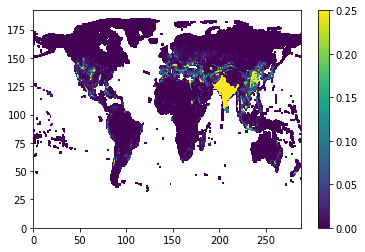

In [36]:
f_irr_CESM[1,:,:][pinb_mask] = 100


h = plt.pcolormesh(np.ma.masked_invalid(f_irr_CESM[1]), vmax=0.25)

plt.colorbar(h)



In [37]:
###################################
#
#Calculate dT_irr
#Execute the algorithm to calculate
#dT_irr globally and regionally.
#
#N.B. this procedure fills the 
#bottom two panels of the plot.
#
###################################

#Define stacked array in which the results are stored
CRU_t = np.zeros((9, 192, 288))
CESM_t = np.zeros((9, 192, 288))

#Execute the algorithm for different threshold values for CRU and CESM
CRU_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[6,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.6,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[7,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.7,False,yr_start1,yr_end1,yr_start2,yr_end2)
CRU_t[8,:,:], _,_,_,_ = calc_irr_impact_regr('CRU_CESM',temp_product_CRU,response,t_res,0.8,False,yr_start1,yr_end1,yr_start2,yr_end2)

CESM_t[0,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.0,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[1,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.1,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[2,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.2,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[3,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.3,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[4,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.4,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[5,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.5,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[6,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.6,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[7,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.7,False,yr_start1,yr_end1,yr_start2,yr_end2)
CESM_t[8,:,:], _,_,_,_ = calc_irr_impact_regr('CESM',temp_product_CESM,response,t_res,0.8,False,yr_start1,yr_end1,yr_start2,yr_end2)


# WT:  save arrays as .mat files for making maps in matlab
sio.savemat('formatlab_CRU_t.mat' , {'CRU_t':CRU_t})
sio.savemat('formatlab_CESM_t.mat', {'CESM_t':CESM_t})
# WT


#Change to 1D, remove NaNs
CRU0 = CRU_t[0,:,:].ravel()[~np.isnan(CRU_t[0,:,:].ravel())]
CRU1 = CRU_t[1,:,:].ravel()[~np.isnan(CRU_t[1,:,:].ravel())]
CRU2 = CRU_t[2,:,:].ravel()[~np.isnan(CRU_t[2,:,:].ravel())]
CRU3 = CRU_t[3,:,:].ravel()[~np.isnan(CRU_t[3,:,:].ravel())]
CRU4 = CRU_t[4,:,:].ravel()[~np.isnan(CRU_t[4,:,:].ravel())]
CRU5 = CRU_t[5,:,:].ravel()[~np.isnan(CRU_t[5,:,:].ravel())]
CRU6 = CRU_t[6,:,:].ravel()[~np.isnan(CRU_t[6,:,:].ravel())]
CRU7 = CRU_t[7,:,:].ravel()[~np.isnan(CRU_t[7,:,:].ravel())]
CRU8 = CRU_t[8,:,:].ravel()[~np.isnan(CRU_t[8,:,:].ravel())]

CESM0 = CESM_t[0,:,:].ravel()[~np.isnan(CESM_t[0,:,:].ravel())]
CESM1 = CESM_t[1,:,:].ravel()[~np.isnan(CESM_t[1,:,:].ravel())]
CESM2 = CESM_t[2,:,:].ravel()[~np.isnan(CESM_t[2,:,:].ravel())]
CESM3 = CESM_t[3,:,:].ravel()[~np.isnan(CESM_t[3,:,:].ravel())]
CESM4 = CESM_t[4,:,:].ravel()[~np.isnan(CESM_t[4,:,:].ravel())]
CESM5 = CESM_t[5,:,:].ravel()[~np.isnan(CESM_t[5,:,:].ravel())]
CESM6 = CESM_t[6,:,:].ravel()[~np.isnan(CESM_t[6,:,:].ravel())]
CESM7 = CESM_t[7,:,:].ravel()[~np.isnan(CESM_t[7,:,:].ravel())]
CESM8 = CESM_t[8,:,:].ravel()[~np.isnan(CESM_t[8,:,:].ravel())]


/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:84: RuntimeWarning: Mean of empty slice
/usr/local/Miniconda3-envs/envs/2018/envs/iacpy2_2018/lib/python2.7/site-packages/ipykernel_launcher.py:85: RuntimeWarning: Mean of empty slice


Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes in temperature and irrigated fraction
Done importing changes i

In [38]:
#Extract the SAS signal for each threshold for CRU and CESM, removing NaN values 
CRU0_reg = np.append(CRU_t[0,101:133,192:220].ravel()[~np.isnan(CRU_t[0,101:133,192:220].ravel())],CRU_t[0,117:133,220:225].ravel()[~np.isnan(CRU_t[0,117:133,220:225].ravel())])
CRU1_reg = np.append(CRU_t[1,101:133,192:220].ravel()[~np.isnan(CRU_t[1,101:133,192:220].ravel())],CRU_t[1,117:133,220:225].ravel()[~np.isnan(CRU_t[1,117:133,220:225].ravel())])
CRU2_reg = np.append(CRU_t[2,101:133,192:220].ravel()[~np.isnan(CRU_t[2,101:133,192:220].ravel())],CRU_t[2,117:133,220:225].ravel()[~np.isnan(CRU_t[2,117:133,220:225].ravel())])
CRU3_reg = np.append(CRU_t[3,101:133,192:220].ravel()[~np.isnan(CRU_t[3,101:133,192:220].ravel())],CRU_t[3,117:133,220:225].ravel()[~np.isnan(CRU_t[3,117:133,220:225].ravel())])
CRU4_reg = np.append(CRU_t[4,101:133,192:220].ravel()[~np.isnan(CRU_t[4,101:133,192:220].ravel())],CRU_t[4,117:133,220:225].ravel()[~np.isnan(CRU_t[4,117:133,220:225].ravel())])
CRU5_reg = np.append(CRU_t[5,101:133,192:220].ravel()[~np.isnan(CRU_t[5,101:133,192:220].ravel())],CRU_t[5,117:133,220:225].ravel()[~np.isnan(CRU_t[5,117:133,220:225].ravel())])
CRU6_reg = np.append(CRU_t[6,101:133,192:220].ravel()[~np.isnan(CRU_t[6,101:133,192:220].ravel())],CRU_t[6,117:133,220:225].ravel()[~np.isnan(CRU_t[6,117:133,220:225].ravel())])
CRU7_reg = np.append(CRU_t[7,101:133,192:220].ravel()[~np.isnan(CRU_t[7,101:133,192:220].ravel())],CRU_t[7,117:133,220:225].ravel()[~np.isnan(CRU_t[7,117:133,220:225].ravel())])
CRU8_reg = np.append(CRU_t[8,101:133,192:220].ravel()[~np.isnan(CRU_t[8,101:133,192:220].ravel())],CRU_t[8,117:133,220:225].ravel()[~np.isnan(CRU_t[8,117:133,220:225].ravel())])

CESM0_reg = np.append(CESM_t[0,101:133,192:220].ravel()[~np.isnan(CESM_t[0,101:133,192:220].ravel())],CESM_t[0,117:133,220:225].ravel()[~np.isnan(CESM_t[0,117:133,220:225].ravel())])
CESM1_reg = np.append(CESM_t[1,101:133,192:220].ravel()[~np.isnan(CESM_t[1,101:133,192:220].ravel())],CESM_t[1,117:133,220:225].ravel()[~np.isnan(CESM_t[1,117:133,220:225].ravel())])
CESM2_reg = np.append(CESM_t[2,101:133,192:220].ravel()[~np.isnan(CESM_t[2,101:133,192:220].ravel())],CESM_t[2,117:133,220:225].ravel()[~np.isnan(CESM_t[2,117:133,220:225].ravel())])
CESM3_reg = np.append(CESM_t[3,101:133,192:220].ravel()[~np.isnan(CESM_t[3,101:133,192:220].ravel())],CESM_t[3,117:133,220:225].ravel()[~np.isnan(CESM_t[3,117:133,220:225].ravel())])
CESM4_reg = np.append(CESM_t[4,101:133,192:220].ravel()[~np.isnan(CESM_t[4,101:133,192:220].ravel())],CESM_t[4,117:133,220:225].ravel()[~np.isnan(CESM_t[4,117:133,220:225].ravel())])
CESM5_reg = np.append(CESM_t[5,101:133,192:220].ravel()[~np.isnan(CESM_t[5,101:133,192:220].ravel())],CESM_t[5,117:133,220:225].ravel()[~np.isnan(CESM_t[5,117:133,220:225].ravel())])
CESM6_reg = np.append(CESM_t[6,101:133,192:220].ravel()[~np.isnan(CESM_t[6,101:133,192:220].ravel())],CESM_t[6,117:133,220:225].ravel()[~np.isnan(CESM_t[6,117:133,220:225].ravel())])
CESM7_reg = np.append(CESM_t[7,101:133,192:220].ravel()[~np.isnan(CESM_t[7,101:133,192:220].ravel())],CESM_t[7,117:133,220:225].ravel()[~np.isnan(CESM_t[7,117:133,220:225].ravel())])
CESM8_reg = np.append(CESM_t[8,101:133,192:220].ravel()[~np.isnan(CESM_t[8,101:133,192:220].ravel())],CESM_t[8,117:133,220:225].ravel()[~np.isnan(CESM_t[8,117:133,220:225].ravel())])


In [39]:
# WT replaced sel by pinb_mask in next lines
#Extract the PINB signal for each threshold for CRU and CESM, removing NaN values 
CRU0_reg_pinb = CRU_t[0,:,:][pinb_mask][~np.isnan(CRU_t[0,:,:][pinb_mask])]
CRU1_reg_pinb = CRU_t[1,:,:][pinb_mask][~np.isnan(CRU_t[1,:,:][pinb_mask])]
CRU2_reg_pinb = CRU_t[2,:,:][pinb_mask][~np.isnan(CRU_t[2,:,:][pinb_mask])]
CRU3_reg_pinb = CRU_t[3,:,:][pinb_mask][~np.isnan(CRU_t[3,:,:][pinb_mask])]
CRU4_reg_pinb = CRU_t[4,:,:][pinb_mask][~np.isnan(CRU_t[4,:,:][pinb_mask])]
CRU5_reg_pinb = CRU_t[5,:,:][pinb_mask][~np.isnan(CRU_t[5,:,:][pinb_mask])]
CRU6_reg_pinb = CRU_t[6,:,:][pinb_mask][~np.isnan(CRU_t[6,:,:][pinb_mask])]
CRU7_reg_pinb = CRU_t[7,:,:][pinb_mask][~np.isnan(CRU_t[7,:,:][pinb_mask])]
CRU8_reg_pinb = CRU_t[8,:,:][pinb_mask][~np.isnan(CRU_t[8,:,:][pinb_mask])]

# WT replaced mistake (CRU_t to CESM_t)
#CESM0_reg_pinb = CESM_t[0,:,:][pinb_mask][~np.isnan(CRU_t[0,:,:][pinb_mask])]
#CESM1_reg_pinb = CESM_t[1,:,:][pinb_mask][~np.isnan(CRU_t[1,:,:][pinb_mask])]
#CESM2_reg_pinb = CESM_t[2,:,:][pinb_mask][~np.isnan(CRU_t[2,:,:][pinb_mask])]
#CESM3_reg_pinb = CESM_t[3,:,:][pinb_mask][~np.isnan(CRU_t[3,:,:][pinb_mask])]
#CESM4_reg_pinb = CESM_t[4,:,:][pinb_mask][~np.isnan(CRU_t[4,:,:][pinb_mask])]
#CESM5_reg_pinb = CESM_t[5,:,:][pinb_mask][~np.isnan(CRU_t[5,:,:][pinb_mask])]
#CESM6_reg_pinb = CESM_t[6,:,:][pinb_mask][~np.isnan(CRU_t[6,:,:][pinb_mask])]
#CESM7_reg_pinb = CESM_t[7,:,:][pinb_mask][~np.isnan(CRU_t[7,:,:][pinb_mask])]
#CESM8_reg_pinb = CESM_t[8,:,:][pinb_mask][~np.isnan(CRU_t[8,:,:][pinb_mask])]
CESM0_reg_pinb = CESM_t[0,:,:][pinb_mask][~np.isnan(CESM_t[0,:,:][pinb_mask])]
CESM1_reg_pinb = CESM_t[1,:,:][pinb_mask][~np.isnan(CESM_t[1,:,:][pinb_mask])]
CESM2_reg_pinb = CESM_t[2,:,:][pinb_mask][~np.isnan(CESM_t[2,:,:][pinb_mask])]
CESM3_reg_pinb = CESM_t[3,:,:][pinb_mask][~np.isnan(CESM_t[3,:,:][pinb_mask])]
CESM4_reg_pinb = CESM_t[4,:,:][pinb_mask][~np.isnan(CESM_t[4,:,:][pinb_mask])]
CESM5_reg_pinb = CESM_t[5,:,:][pinb_mask][~np.isnan(CESM_t[5,:,:][pinb_mask])]
CESM6_reg_pinb = CESM_t[6,:,:][pinb_mask][~np.isnan(CESM_t[6,:,:][pinb_mask])]
CESM7_reg_pinb = CESM_t[7,:,:][pinb_mask][~np.isnan(CESM_t[7,:,:][pinb_mask])]
CESM8_reg_pinb = CESM_t[8,:,:][pinb_mask][~np.isnan(CESM_t[8,:,:][pinb_mask])]

In [40]:
#select number of bins for plotting, based on response
if response == 'PC/PD':
    binrange = range(0,6)
elif response == 'PD':
    binrange = range(0,9)

In [41]:
#Change into format readable by boxplot, removing entries without data if needed
CRU_data = [CRU0, CRU1, CRU2, CRU3, CRU4, CRU5, CRU6, CRU7, CRU8]
CRU_dataplot = [x for x in CRU_data if x.shape[0] > 0]
CRU_lenlist = [x.shape[0] for x in CRU_dataplot]

CESM_data = [CESM0, CESM1, CESM2, CESM3, CESM4, CESM5, CESM6, CESM7, CESM8]
CESM_dataplot = [x[(x > -999) & (x < 999)] for x in CESM_data if x.shape[0] > 0]
CESM_lenlist = [x.shape[0] for x in CESM_dataplot]

#Calculate medians and percentiles
CRU_medians = [np.median(x) for x in CRU_dataplot]
CESM_medians = [np.median(x) for x in CESM_dataplot]

CRU_pctls = [np.percentile(x,[25,75]) for x in CRU_dataplot]
CESM_pctls = [np.percentile(x,[25,75]) for x in CESM_dataplot]

#Only plot the results if there are enough data points for the f_irr bin
for u in binrange:
    if CRU_lenlist[u] < 5:
        
        CRU_medians[u] = np.nan
        CRU_pctls[u] = np.array([np.nan,np.nan])
    
    if CESM_lenlist[u] < 5:
        
        CESM_medians[u] = np.nan
        CESM_pctls[u] = np.array([np.nan,np.nan])



# =============

#Store the results for SAS into a format readable by the boxplot function
# WT replaced next line
#CRU_data_reg = [CRU0_reg, CRU1_reg, CRU2_reg, CRU3_reg, CRU4_reg, CRU5_reg, CRU6_reg, CRU7_reg, CRU8_reg]
CRU_data_reg = [CRU0_reg_pinb, CRU1_reg_pinb, CRU2_reg_pinb, CRU3_reg_pinb, CRU4_reg_pinb, CRU5_reg_pinb, CRU6_reg_pinb, CRU7_reg_pinb, CRU8_reg_pinb]
CRU_dataplot_reg = [x for x in CRU_data_reg if x.shape[0] > 0]
CRU_lenlist_reg = [x.shape[0] for x in CRU_dataplot_reg]

# WT replaced next line
#CESM_data_reg = [CESM0_reg, CESM1_reg, CESM2_reg, CESM3_reg, CESM4_reg, CESM5_reg, CESM6_reg, CESM7_reg, CESM8_reg]
CESM_data_reg = [CESM0_reg_pinb, CESM1_reg_pinb, CESM2_reg_pinb, CESM3_reg_pinb, CESM4_reg_pinb, CESM5_reg_pinb, CESM6_reg_pinb, CESM7_reg_pinb, CESM8_reg_pinb]
CESM_dataplot_reg = [x for x in CESM_data_reg if x.shape[0] > 0]
CESM_lenlist_reg = [x.shape[0] for x in CESM_dataplot_reg]

#Calculate the medians and the percentiles
CRU_reg_medians = [np.median(x) for x in CRU_dataplot_reg]
CESM_reg_medians = [np.median(x) for x in CESM_dataplot_reg]

CRU_reg_pctls = [np.percentile(x,[25,75]) for x in CRU_dataplot_reg]
CESM_reg_pctls = [np.percentile(x,[25,75]) for x in CESM_dataplot_reg]


#Change values into NaNs if there is not enough data in the bin
for u in binrange:
    if CRU_lenlist_reg[u] < 5:
        CRU_reg_medians[u] = np.nan
        CRU_reg_pctls[u] = np.array([np.nan,np.nan])
    if CESM_lenlist_reg[u] < 5:
        CESM_reg_medians[u] = np.nan
        CESM_reg_pctls[u] = np.array([np.nan,np.nan])



# Define functions

In [42]:

def calc_stat_ALL(data_df, data_dT):

    #Define empty lists
    medians = []
    pctls = []
    counts = []
    
    #If there are enough data points in the bin, calculate the bin size, median and quartiles
    for x in binrange:
        sel = (data_df >= bins[x]) & (data_df < bins[x+1])
        count = data_dT[sel].shape[0]
        
        if  count >= 5:
            medians.append(np.nanmedian(data_dT[sel]))
            pctls.append(np.nanpercentile(data_dT[sel],[25,75]))
            counts.append(count)
            
        else:
            medians.append(np.nan)
            pctls.append(np.array([np.nan,np.nan]))
            counts.append(np.nan)

    return medians, pctls, counts
    

In [43]:
def plot_(ax, x, medians, pctls, width, color, label):
    
    # plot quartiles (as a vertical line)
    for u in binrange:
        ax.plot((x[u], x[u]), (pctls[u]), '-', color=color, linewidth=width, solid_capstyle='butt')
    
    # dummy plot for the legend entry
    ax.plot([], '-', color=color, linewidth=width, solid_capstyle='butt', label=label)
    
        
        
    ax.plot(x, medians, '|', color='k', markeredgewidth=width, markersize=2)

In [44]:
#plt.subplot?

# Plotting

In [45]:
width = 4
color_CRU = '0.1'

color_CRU = '#3690c0'
color_CESM = '#fd8d3c'
#

if response == 'PD':
    bins = np.arange(0, 1., 0.1)
elif response == 'PC/PD':
    bins = np.arange(0, 0.7, 0.1)

# x-locations of the data points on the plot for CRU and CESM
bins_plot_CRU = bins[:-1] - 0.015
bins_plot_CESM = bins[:-1] + 0.015


In [46]:
print CRU_lenlist
print CRU_lenlist_reg

print CESM_lenlist
print CESM_lenlist_reg

[12275, 426, 141, 63, 30, 4]
[299, 131, 61, 36, 18, 3]
[12467, 432, 141, 63, 30, 4]
[301, 131, 61, 36, 18, 3]


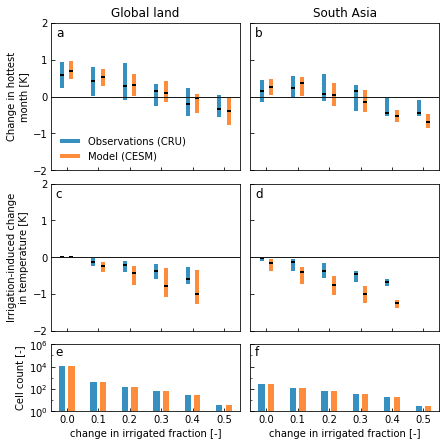

In [47]:
#Define a figure with four subplots and the x-locations of the 
#data points on the plot for CRU and CESM


def full_plot():

    f = plt.figure()
    f.set_size_inches(16 / 2.54, 16 / 2.54)


    gs = gridspec.GridSpec(5, 2)


    ys = [slice(0, 2), slice(2, 4), 4]

    ax0 = plt.subplot(gs[0:2, 0])
    ax1 = plt.subplot(gs[0:2, 1], sharey=ax0)

    ax2 = plt.subplot(gs[2:4, 0])
    ax3 = plt.subplot(gs[2:4, 1], sharey=ax2)

    ax4 = plt.subplot(gs[4, 0])
    ax5 = plt.subplot(gs[4, 1], sharey=ax4)

    axes = (ax0, ax1, ax2, ax3, ax4, ax5)

    ############################################


    #Calculate the medians and Q25-Q75 and plot the results

    for j in range(0, 2): # 0 = global, 1 = regional
        data_dT_CRU = dT_plot_CRU[j]
        data_dT_CESM = dT_plot_CESM[j]
        data_df_CRU = df_plot_CRU[j]
        data_df_CESM = df_plot_CESM[j]

        # plot CRU
        medians, pctls, counts = calc_stat_ALL(data_df_CRU, data_dT_CRU)
        plot_(axes[j], bins_plot_CRU, medians, pctls, width, color_CRU, label="Observations (CRU)")

        

        #Repeat the plotting procedure for CESM
        medians, pctls, counts = calc_stat_ALL(data_df_CESM, data_dT_CESM)
        plot_(axes[j], bins_plot_CESM, medians, pctls, width, color_CESM, label="Model (CESM)")

    axes[4].bar(bins_plot_CRU, CRU_lenlist, 0.02, color=color_CRU)
    axes[4].bar(bins_plot_CESM, CESM_lenlist, 0.02, color=color_CESM)

    axes[5].bar(bins_plot_CRU, CRU_lenlist_reg, 0.02, color=color_CRU)
    axes[5].bar(bins_plot_CESM, CESM_lenlist_reg, 0.02, color=color_CESM)
    #Plotting results

    ########################################
    #Fill bottom left subfigure (dT_irr GIL)
    ########################################


    plot_(axes[2], bins_plot_CRU, CRU_medians, CRU_pctls, width, color_CRU, label="Observations (CRU)")
    plot_(axes[2], bins_plot_CESM, CESM_medians, CESM_pctls, width, color_CESM, label="Observations (CRU)")


    plot_(axes[3], bins_plot_CRU, CRU_reg_medians, CRU_reg_pctls, width, color_CRU, label="Observations (CRU)")
    plot_(axes[3], bins_plot_CESM, CESM_reg_medians, CESM_reg_pctls, width, color_CESM, label="Observations (CRU)")


    # =====================

    ##############################
    #Some general plotting options
    ##############################


    # if SREX_region == 'SAS':
    #     title_list = ['Global land', 'South Asia', 'Global land, irrigated', 'South Asia, irrigated']


    # axes[0].set_ylabel(r'$\Delta $T$_{tot}$ [$^\circ$C]',size=15)
    # axes[2].set_ylabel(r'$\Delta $T$_{irr}$ [$^\circ$C]',size=15)

    axes[0].set_ylabel('Change in hottest\nmonth [K]', size=10)
    axes[2].set_ylabel('Irrigation-induced change\nin temperature [K]', size=10)


    for i, ax in enumerate(axes[:4]):

        if response == 'PD':
            ax.set_xlim([-0.05,0.75])
            ax.set_ylim([-2,2])
            ax.set_xticks(np.arange(0,0.9,0.1))
            ax.set_yticks(np.arange(-2,3,1))
        #     ax.set_title(title_list[i])
            ax.axhline(0, color='0.1', lw=1)
            ax.set_xlim((-0.05, 0.75))
            ax.set_xticklabels([])
        elif response == 'PC/PD':
            ax.set_xlim([-0.05,0.55])
            ax.set_ylim([-2,2])
            ax.set_xticks(np.arange(0,0.6,0.1))
            ax.set_yticks(np.arange(-2,3,1))
        #     ax.set_title(title_list[i])
            ax.axhline(0, color='0.1', lw=1)
            ax.set_xlim((-0.05, 0.55))
            ax.set_xticklabels([])

    if response == 'PD':
        axes[-2].set_xlabel('irrigated fraction, present day [-]')
        axes[-1].set_xlabel('irrigated fraction, present day [-]')
    elif response == 'PC/PD':
        axes[-2].set_xlabel('change in irrigated fraction [-]')
        axes[-1].set_xlabel('change in irrigated fraction [-]')
        

    # title_list = ['Global land', 'South Asia', 'Global land, irrigated', 'South Asia, irrigated']
    for i, ax in enumerate(axes[-2:]):

        if response == 'PD':
            ax.set_yscale('log')
            ax.set_ylim([1, 1e6])
            ax.set_yticks([1e0, 1e2, 1e4, 1e6])
            ax.set_xticks(np.arange(0,0.9,0.1))
            ax.set_xlim((-0.05, 0.75))
            # ax.set_title(title_list[i])
        elif response == 'PC/PD':
            ax.set_yscale('log')
            ax.set_ylim([1, 1e6])
            ax.set_yticks([1e0, 1e2, 1e4, 1e6])
            ax.set_xticks(np.arange(0,0.6,0.1))
            ax.set_xlim((-0.05, 0.55))
            # ax.set_title(title_list[i])

        ax.set_yticks([1e1, 1e3, 1e5], minor=True)
        ax.set_yticklabels([], minor=True)


    #axes[5].set_yticklabels([])
    axes[4].set_ylabel('Cell count [-]')


    axes[0].set_title('Global land')
    axes[1].set_title('South Asia')




    #f.text(0.5, 0.5, '$t_{ref}$: %i-%i, $t_{PD}$: %i-%i'%(yr_start1,yr_end1,yr_start2,yr_end2),ha='center',va='center',fontsize=14)
    #plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.08)


    d = 0.025
    panel_list = ['a','b','c','d', 'e', 'f']
    for i, ax in enumerate(axes):

    #     ax.set_title(panel_list[i], loc='left') #, weight='semibold')

        ax.text(0 + d, 1 - d, panel_list[i], transform=ax.transAxes, va='top', fontsize=12)

        ax.tick_params(direction='in', which='both')
        ax.yaxis.minorTicks


    axes[1].tick_params(labelleft=False)
    axes[3].tick_params(labelleft=False)
    axes[5].tick_params(labelleft=False)


    axes[5].tick_params(axis='y',which='minor')



    f.tight_layout()

    f.subplots_adjust(hspace=0.2)


    l = axes[0].legend(loc='lower left')
    l_f = l.get_frame()
    l_f.set_edgecolor('none')

    
    return f
    
    
    
f = full_plot()

if response == 'PD':
    f.savefig('CRU_CESM_binnedboxplot_PD_regional_WT_MH_AV_WT_AV.pdf')
elif response == 'PC/PD':
    f.savefig('CRU_CESM_binnedboxplot_PC-PD_regional_WT_MH_AV_WT_AV.pdf')

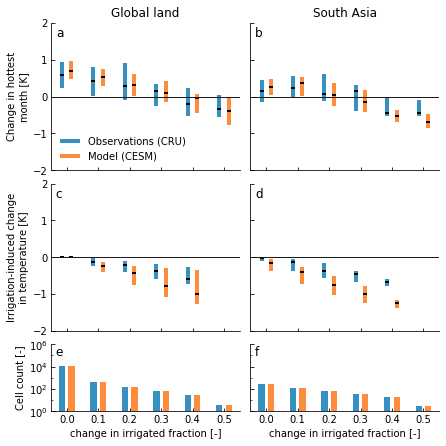

In [48]:

f = full_plot()

sns.despine(f)

if response == 'PD':
    f.savefig('CRU_CESM_binnedboxplot_PD_regional_WT_MH_AV_WT_AV_despine.pdf')
elif response == 'PC/PD':
    f.savefig('CRU_CESM_binnedboxplot_PC-PD_regional_WT_MH_AV_WT_AV_despine.pdf')

In [49]:
def calc_stat_ALL_DIFF(data_df, data_dT, data_dT_irrig):

    # calculate the median and IQR of the difference between all land and irrigated land
    
    
    #Define empty lists
    medians = []
    pctls = []
    counts = []
    
    #If there are enough data points in the bin, calculate the bin size, median and quartiles
    for x in binrange:
        sel = (data_df >= bins[x]) & (data_df < bins[x+1])
        
        count_ALL = data_dT[sel].shape[0]
        count_IRR = data_dT_irrig[x].shape[0]
        
        
        if  count_ALL >= 5 and count_IRR >= 5:

            data_ALL = data_dT[sel]
            data_IRR = data_dT_irrig[x]
            
            idx = min(count_ALL, count_IRR)
            
            data = data_ALL[:idx] - data_IRR[:idx]

            
            
            medians.append(np.median(data))
            pctls.append(np.percentile(data, [25,75]))
            
        else:
            medians.append(np.nan)
            pctls.append(np.array([np.nan,np.nan]))

    return medians, pctls


j = 0

data_dT_CRU = dT_plot_CRU[j]
data_df_CRU = df_plot_CRU[j]




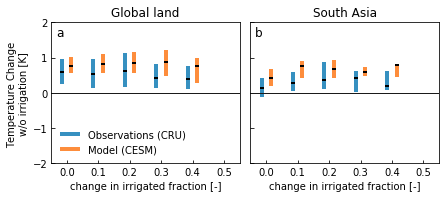

In [50]:
def plot_DIFF():

    f, axes = plt.subplots(1, 2, sharey=True)

    f.set_size_inches(16 / 2.54, 16 / 2.54 / 2.2)


    ax = axes[0]

    j = 0 # GLOBAL

    medians, pctls = calc_stat_ALL_DIFF(df_plot_CRU[j], dT_plot_CRU[j], CRU_dataplot)
    plot_(ax, bins_plot_CRU, medians, pctls, width, color_CRU, label="Observations (CRU)")


    medians, pctls = calc_stat_ALL_DIFF(df_plot_CESM[j], dT_plot_CESM[j], CESM_dataplot)
    plot_(ax, bins_plot_CESM, medians, pctls, width, color_CESM, label="Model (CESM)")

    # ==============================

    ax = axes[1]

    j = 1 # REGIONAL

    medians, pctls = calc_stat_ALL_DIFF(df_plot_CRU[j], dT_plot_CRU[j], CRU_dataplot_reg)
    plot_(ax, bins_plot_CRU, medians, pctls, width, color_CRU, label="Observations (CRU)")


    medians, pctls = calc_stat_ALL_DIFF(df_plot_CESM[j], dT_plot_CESM[j], CESM_dataplot_reg)
    plot_(ax, bins_plot_CESM, medians, pctls, width, color_CESM, label="Model (CESM)")






    for i, ax in enumerate(axes):
        
        if response == 'PD':
            ax.set_xlim([-0.05,0.75])
            ax.set_ylim([-2, 2])
            ax.set_xticks(np.arange(0,0.9,0.1))
            ax.set_yticks(np.arange(-2,3,1))
            ax.axhline(0, color='0.1', lw=1)
            ax.set_xlim((-0.05, 0.75))
        elif response == 'PC/PD':
            ax.set_xlim([-0.05,0.55])
            ax.set_ylim([-2,2])
            ax.set_xticks(np.arange(0,0.6,0.1))
            ax.set_yticks(np.arange(-2,3,1))
            ax.axhline(0, color='0.1', lw=1)
            ax.set_xlim((-0.05,0.55))


    l = axes[0].legend()
    l_f = l.get_frame()
    l_f.set_edgecolor('none')


    axes[0].set_title('Global land')
    axes[1].set_title('South Asia')

    if response == 'PD':
        axes[-2].set_xlabel('irrigated fraction, present day [-]')
        axes[-1].set_xlabel('irrigated fraction, present day [-]')
    elif response == 'PC/PD':
        axes[-2].set_xlabel('change in irrigated fraction [-]')
        axes[-1].set_xlabel('change in irrigated fraction [-]')

    axes[0].set_ylabel('Temperature Change \nw/o irrigation [K]')

    d = 0.025
    panel_list = ['a','b','c','d', 'e', 'f']
    for i, ax in enumerate(axes):

    #     ax.set_title(panel_list[i], loc='left') #, weight='semibold')

        ax.text(0 + d, 1 - d, panel_list[i], transform=ax.transAxes, va='top', fontsize=12)

        ax.tick_params(direction='in', which='both')
        ax.yaxis.minorTicks

    f.tight_layout()
    
    return f


f = plot_DIFF()

if response == 'PD':
    f.savefig('CRU_CESM_binnedboxplot_PD_regional_WT_MH_AV_WT_AV_DIFF.pdf')
elif response == 'PC/PD':
    f.savefig('CRU_CESM_binnedboxplot_PC-PD_regional_WT_MH_AV_WT_AV_DIFF.pdf')

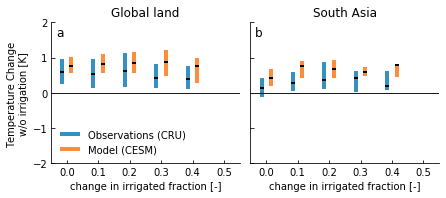

In [51]:
f = plot_DIFF()
sns.despine(f)
if response == 'PD':
    f.savefig('CRU_CESM_binnedboxplot_PD_regional_WT_MH_AV_WT_AV_DIFF_despine.pdf')
elif response == 'PC/PD':
    f.savefig('CRU_CESM_binnedboxplot_PC-PD_regional_WT_MH_AV_WT_AV_DIFF_despine.pdf')